# Лабораторная работа №7
-----------------------
**Классификация (Байесовские методы, деревья)**

----------------------- 

## Цель:
Ознакомиться с методами классификации модуля Sklearn

## Выполнение

### imports

In [2]:
import pandas as pd
import numpy  as np

from sklearn import preprocessing
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split 
from sklearn import tree

import matplotlib.pyplot as plt

### Загрузка данных

In [3]:
data = pd.read_csv('iris.data', header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()

np.unique(labels)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
Y = preprocessing.LabelEncoder().fit_transform(labels)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

### Байесовские методы

In [53]:
gnb = naive_bayes.GaussianNB()

Y_pred = gnb.fit(X_train, Y_train).predict(X_test)

print((Y_test != Y_pred).sum())

4


In [8]:
gnb.score(X_test, Y_test)

0.9866666666666667

In [9]:
def plot_classifier(classifier, title=""):
    if (not title):
        title = type(classifier).__name__
    
    test_size_range = np.arange(0.05, 0.95, 0.05)
    wrong_classified = []
    accuracy = []

    for test_size in test_size_range:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=830303)
        Y_pred = classifier.fit(X_train, Y_train).predict(X_test)
        wrong_classified.append((Y_test != Y_pred).sum())
        accuracy.append(classifier.score(X_test, Y_test))

    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle(title)

    axs[0].plot(test_size_range, wrong_classified)
    axs[0].set_ylabel("Wrong classified")
    axs[0].set_xlabel("Test size")
    axs[0].grid("both")

    axs[1].plot(test_size_range, accuracy)
    axs[1].set_ylabel("Accuracy")
    axs[1].set_xlabel("Test size")

    plt.show()

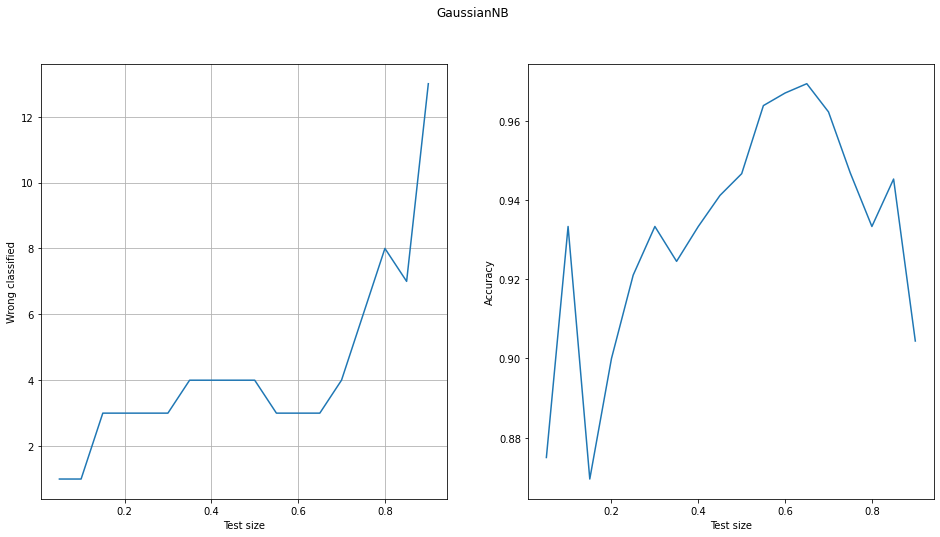

In [10]:
plot_classifier(naive_bayes.GaussianNB(), '')

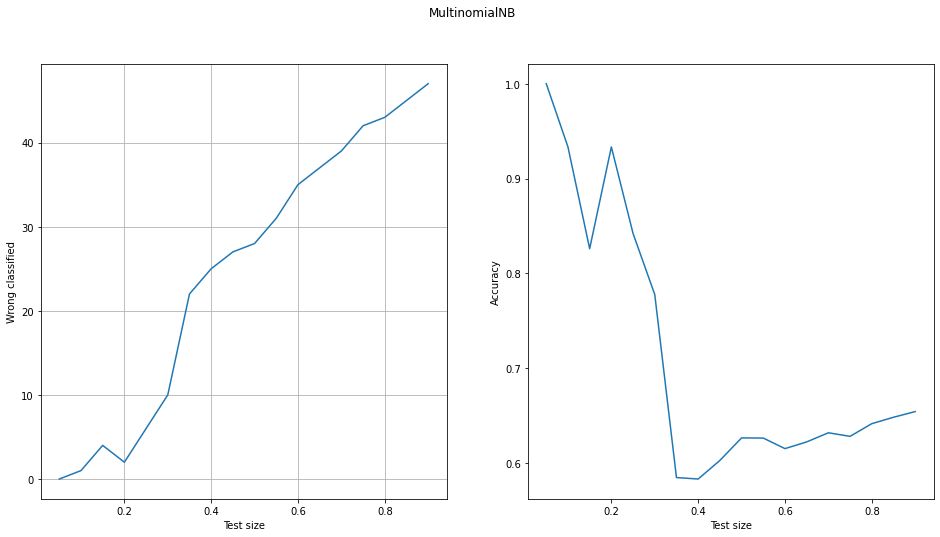

In [11]:
plot_classifier(naive_bayes.MultinomialNB())

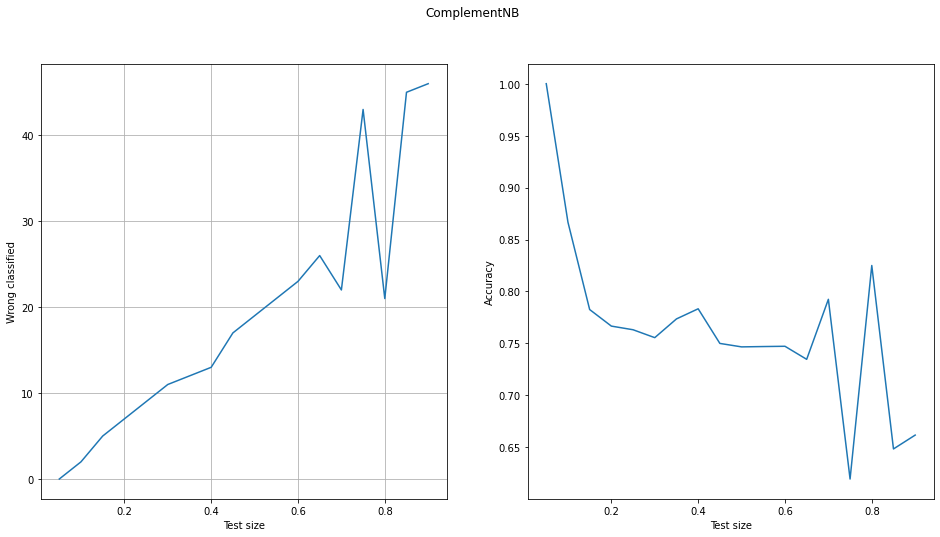

In [12]:
plot_classifier(naive_bayes.ComplementNB())

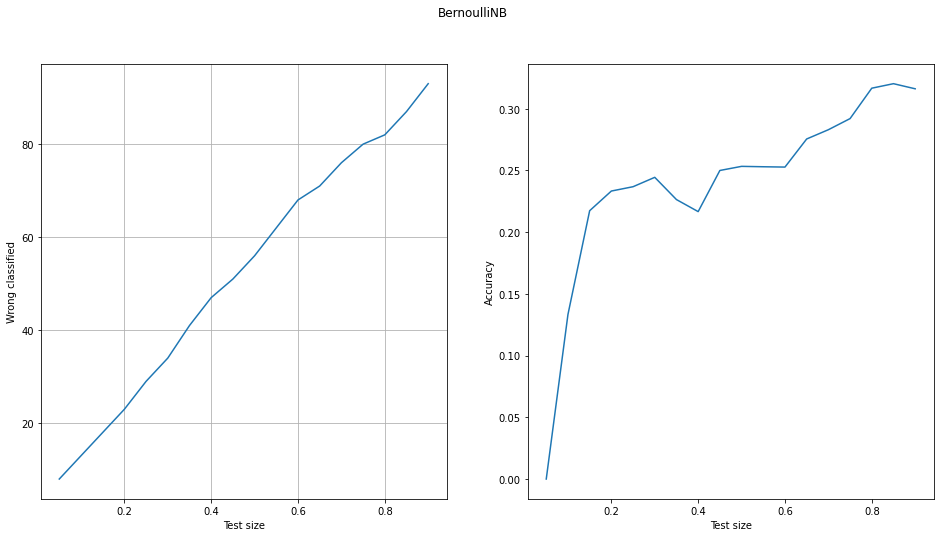

In [13]:
plot_classifier(naive_bayes.BernoulliNB())

### Классифицирующие деревья

In [55]:
tclf = tree.DecisionTreeClassifier()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
Y_pred = tclf.fit(X_train, Y_train).predict(X_test)

print(f'{(Y_test != Y_pred).sum()=}')
print(f'{tclf.score(X_test, Y_test)=}')

(Y_test != Y_pred).sum()=2
tclf.score(X_test, Y_test)=0.9733333333333334


In [15]:
print(f'{tclf.get_n_leaves()=}')
print(f'{tclf.get_depth()=}')

tclf.get_n_leaves()=5
tclf.get_depth()=4


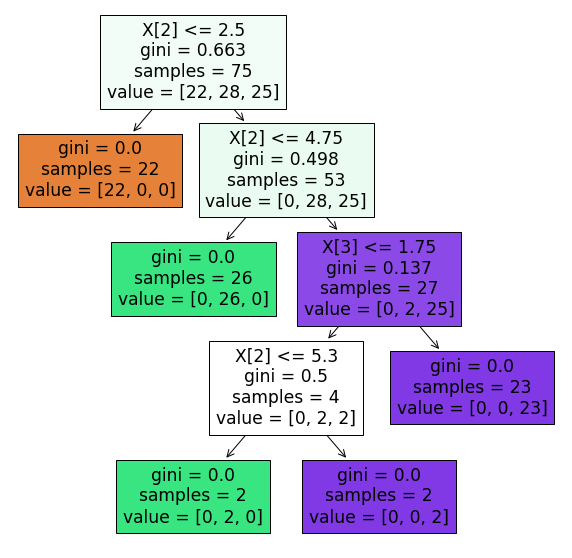

In [16]:
plt.subplots(1,1,figsize = (10,10))
tree.plot_tree(tclf, filled = True)
plt.show()

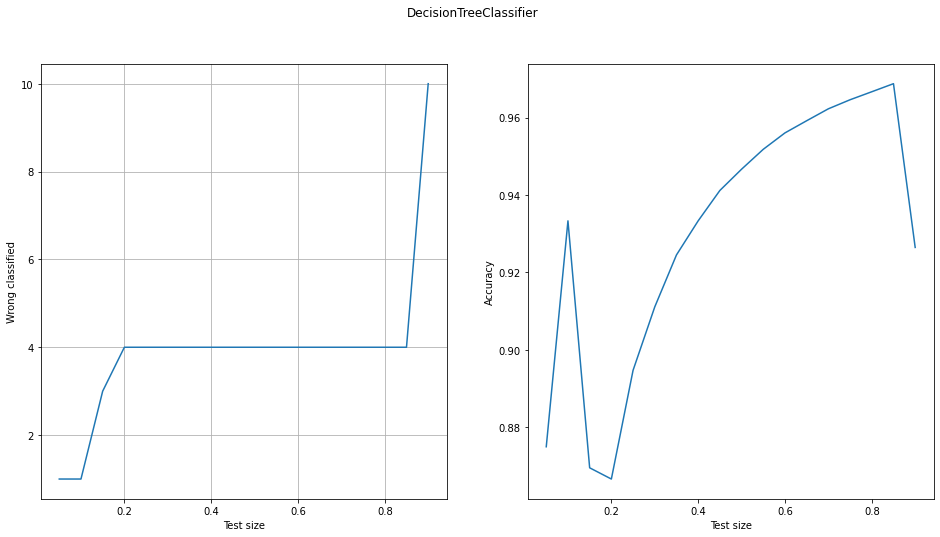

In [56]:
plot_classifier(tclf)

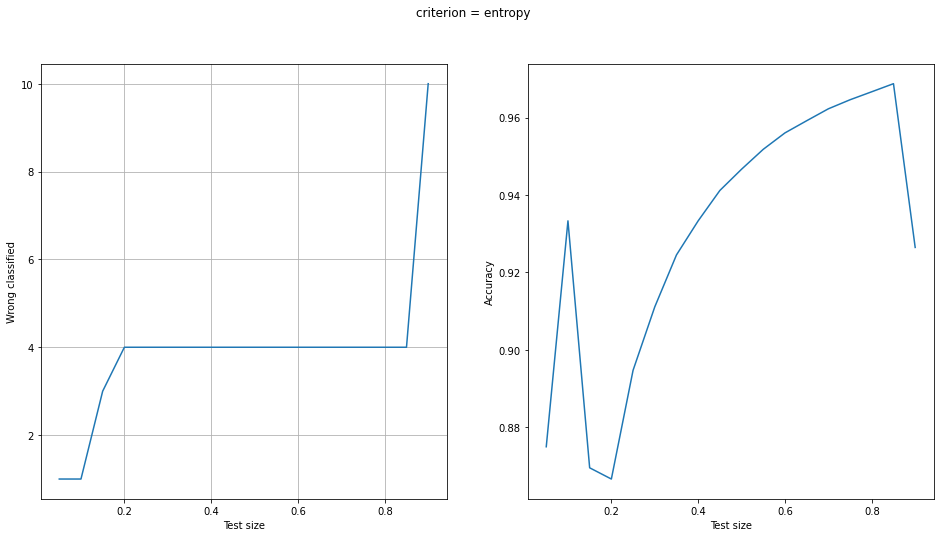

In [18]:
plot_classifier(
    tree.DecisionTreeClassifier(criterion="entropy"),
    "criterion = entropy"
)

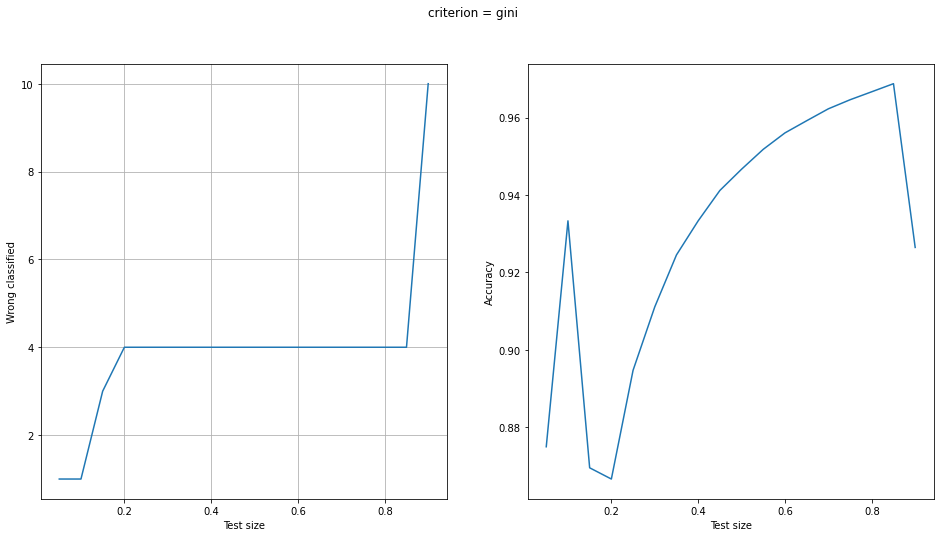

In [19]:
plot_classifier(
    tree.DecisionTreeClassifier(criterion="gini"),
    "criterion = gini"
)

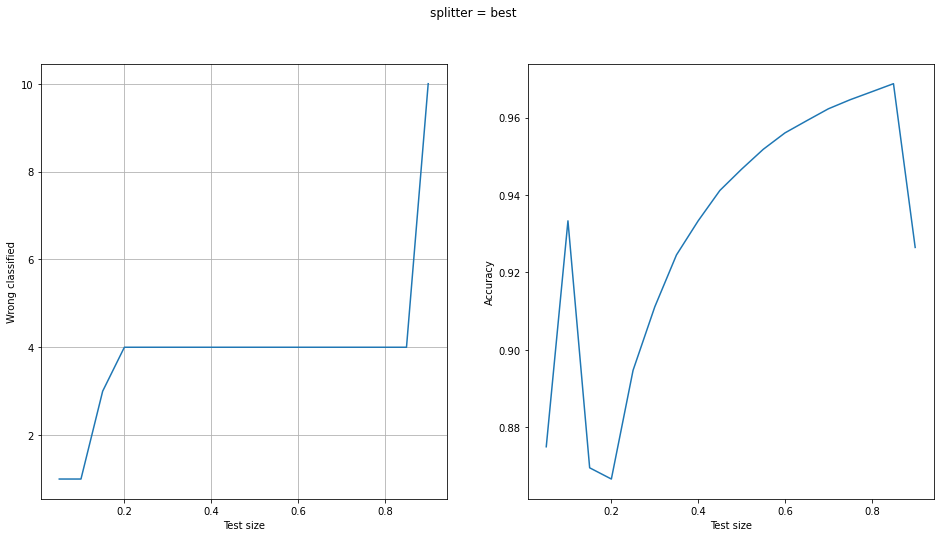

In [20]:
plot_classifier(
    tree.DecisionTreeClassifier(splitter="best"),
    "splitter = best"
)

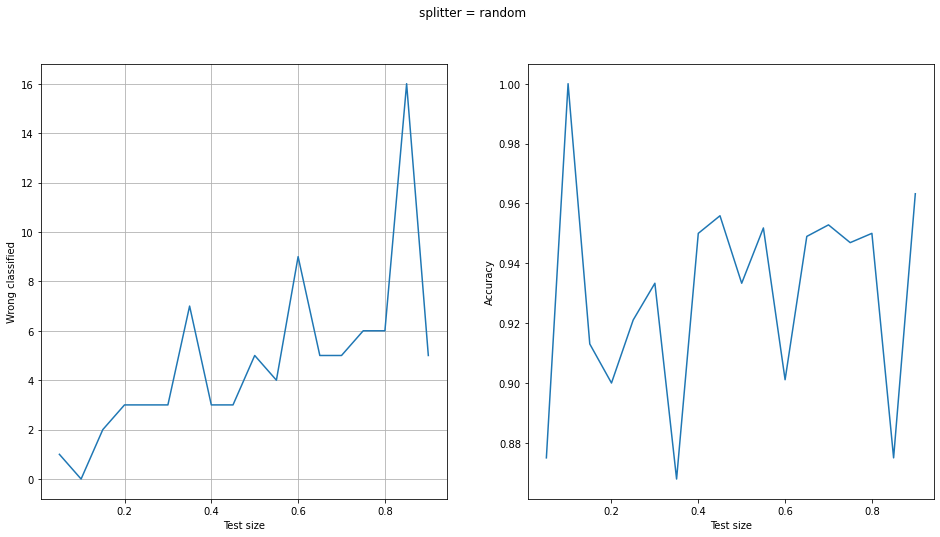

In [21]:
plot_classifier(
    tree.DecisionTreeClassifier(splitter="random"),
    "splitter = random"
)

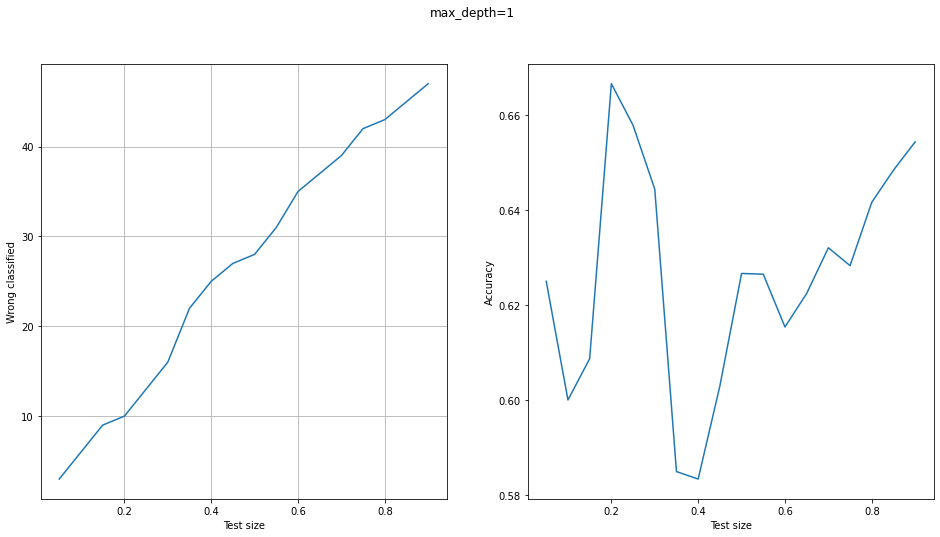

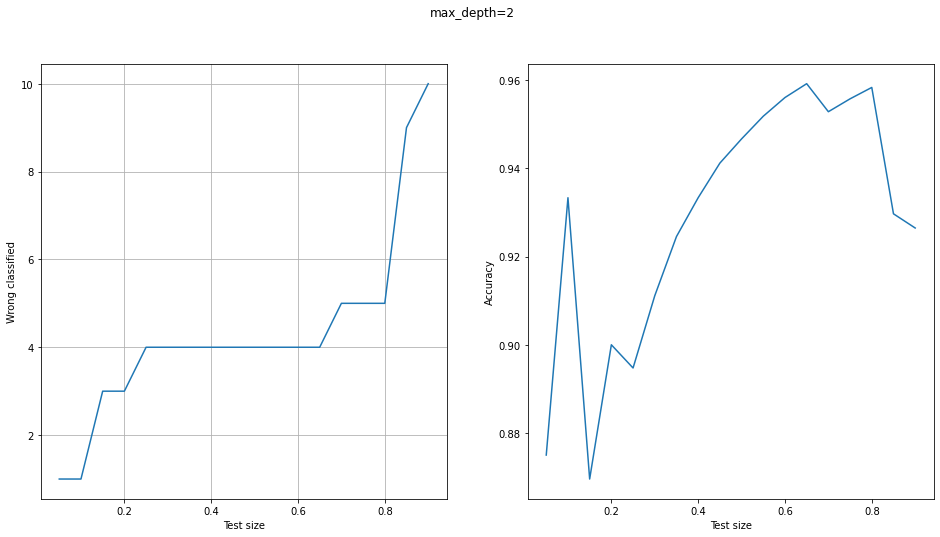

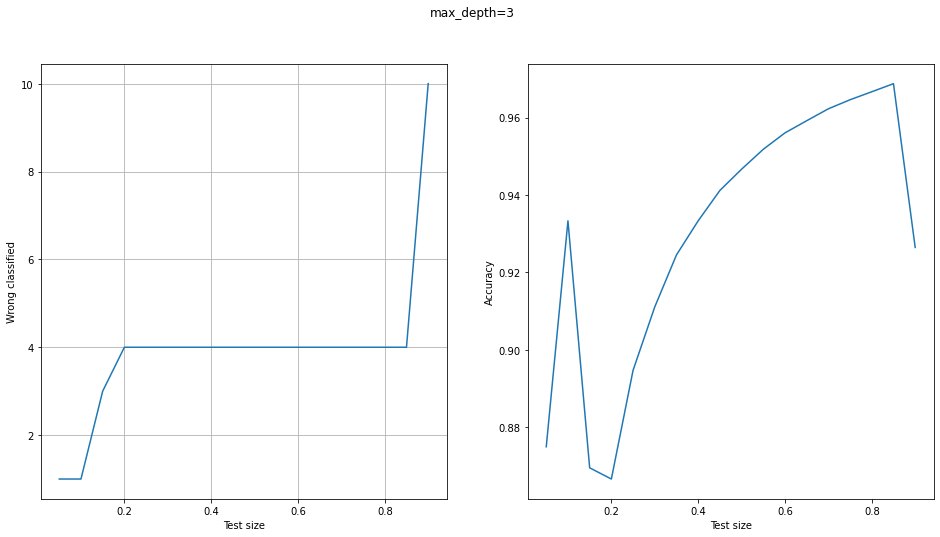

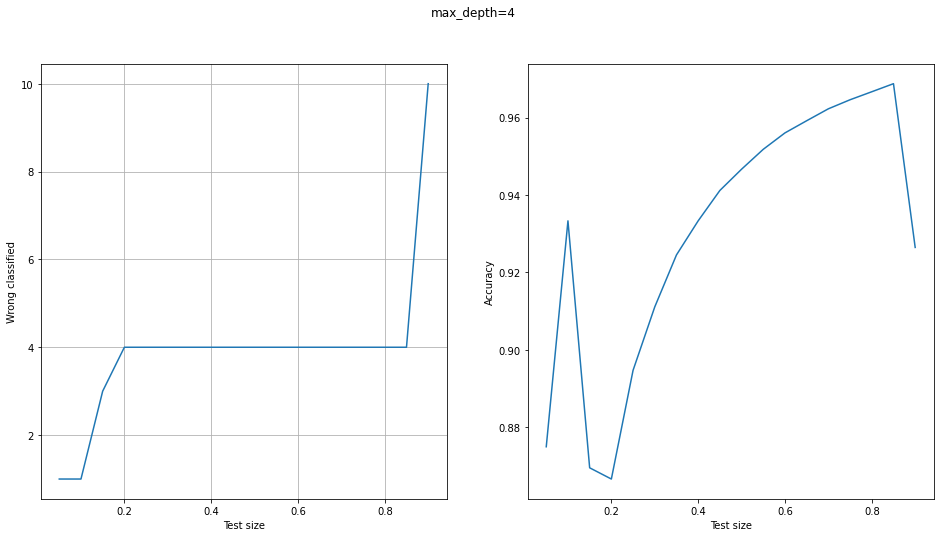

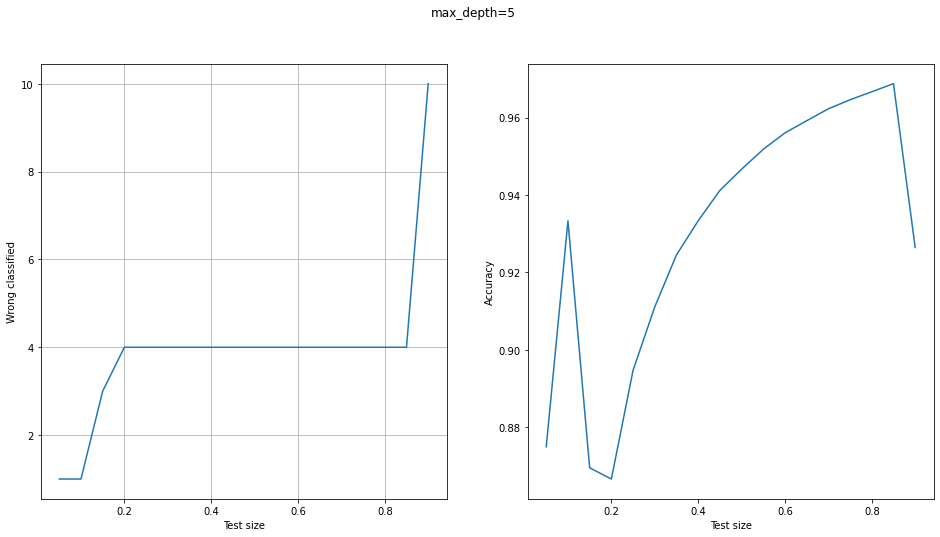

In [22]:
for max_depth in np.arange(1, 6, 1):
    plot_classifier(
        tree.DecisionTreeClassifier(max_depth=max_depth),
        f"{max_depth=}"
    )

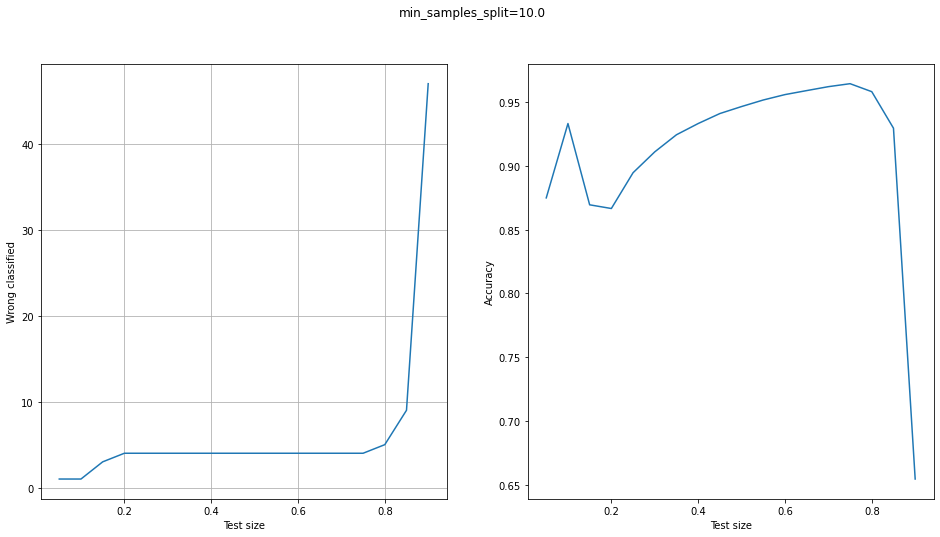

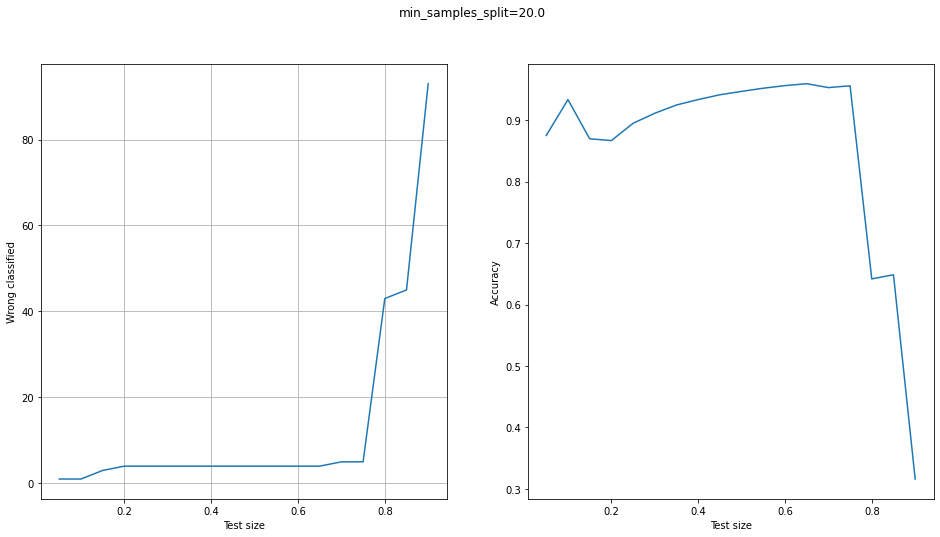

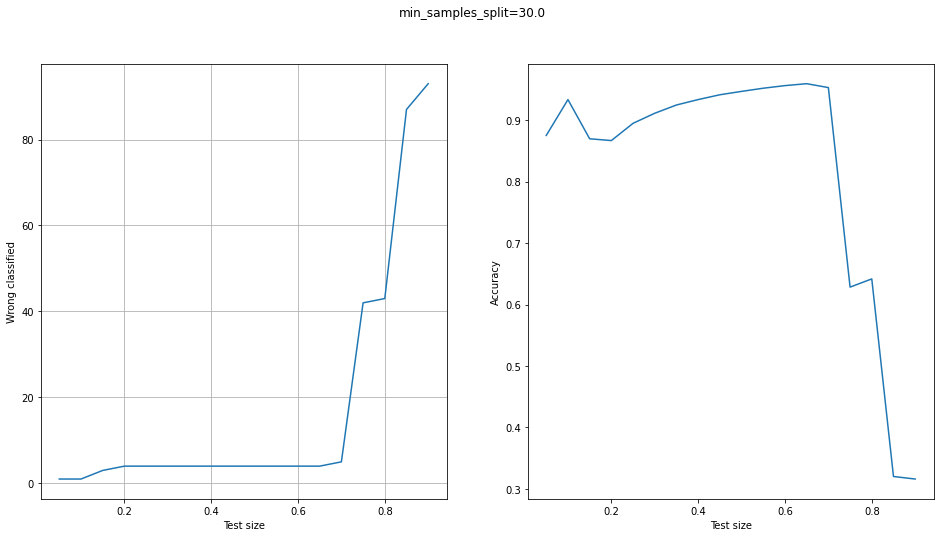

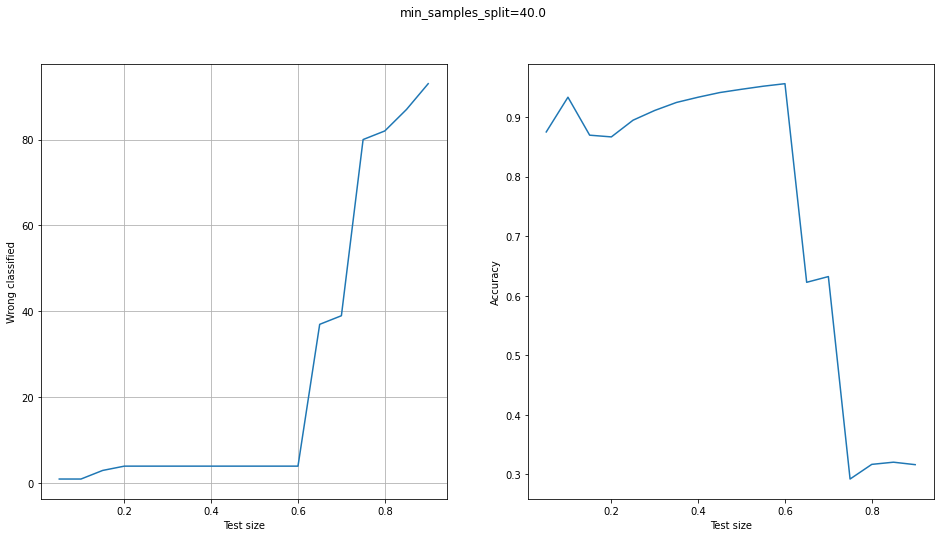

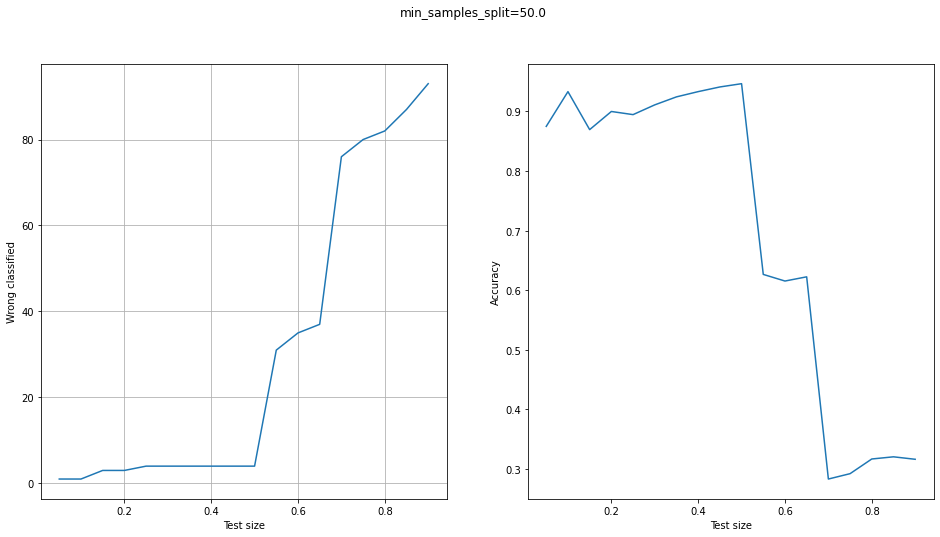

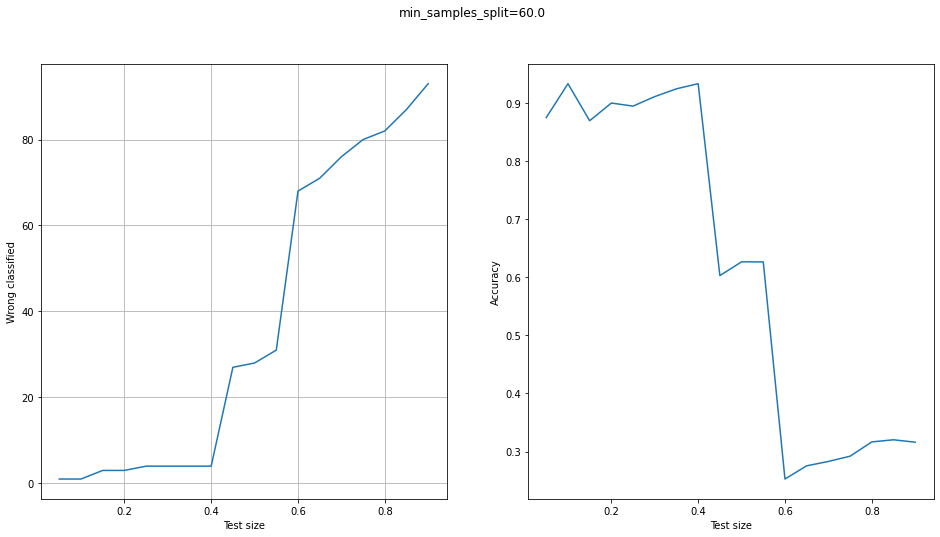

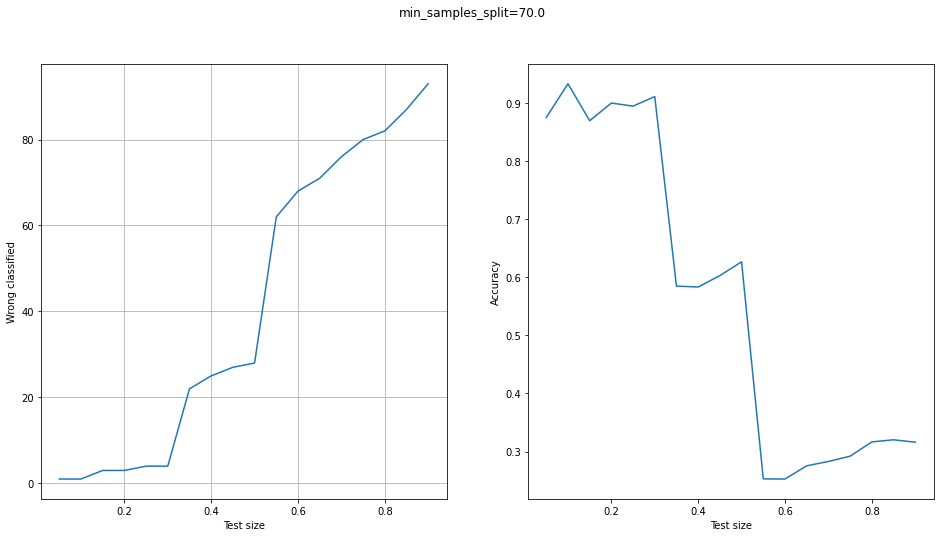

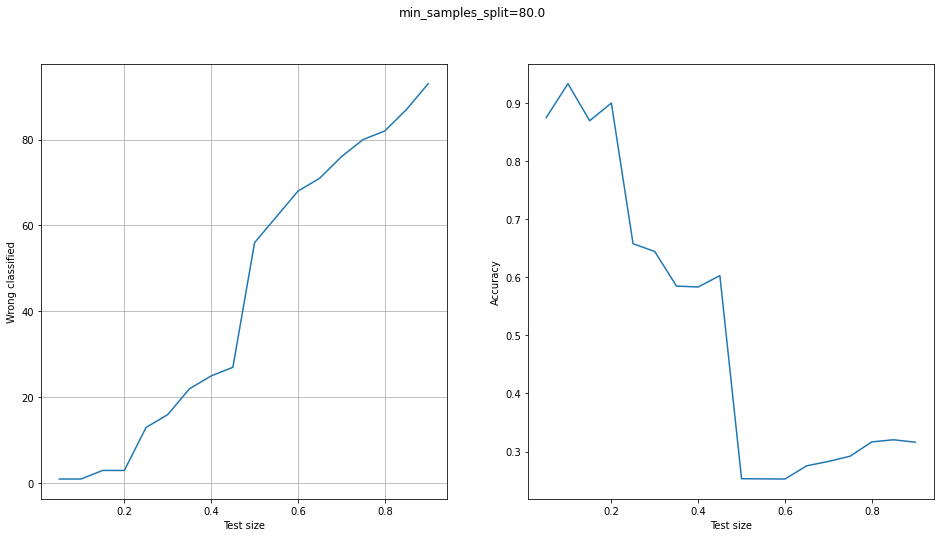

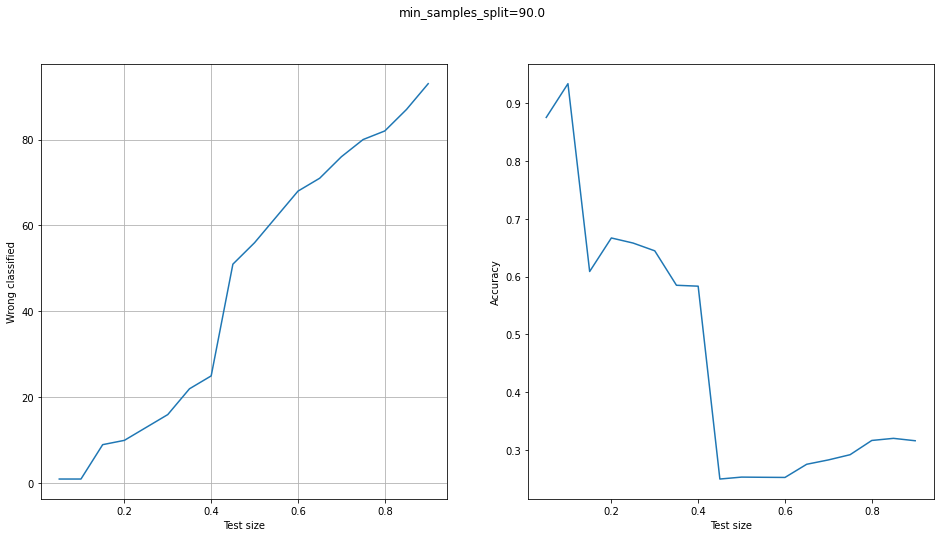

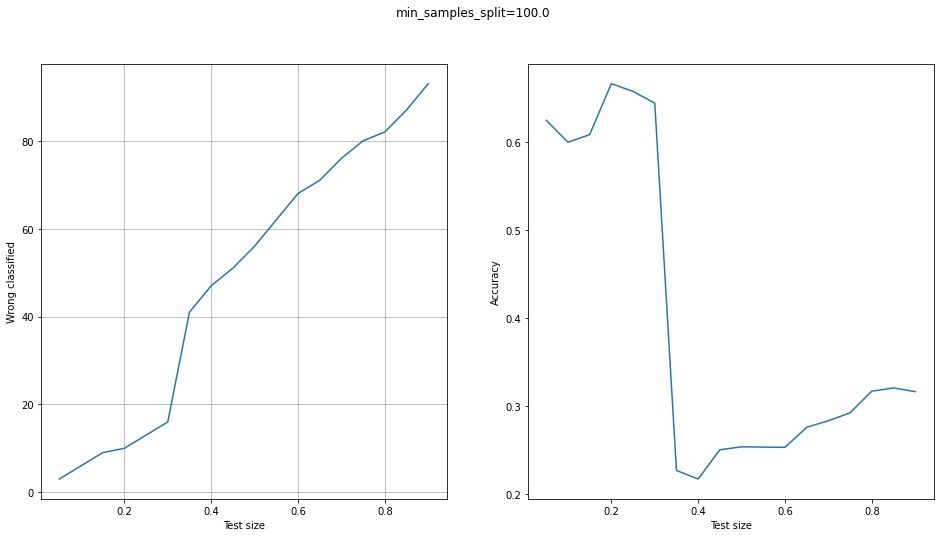

In [23]:
for min_samples_split in np.linspace(10, 100, 10):
    plot_classifier(
        tree.DecisionTreeClassifier(min_samples_split=int(min_samples_split)),
        f"{min_samples_split=}"
    )

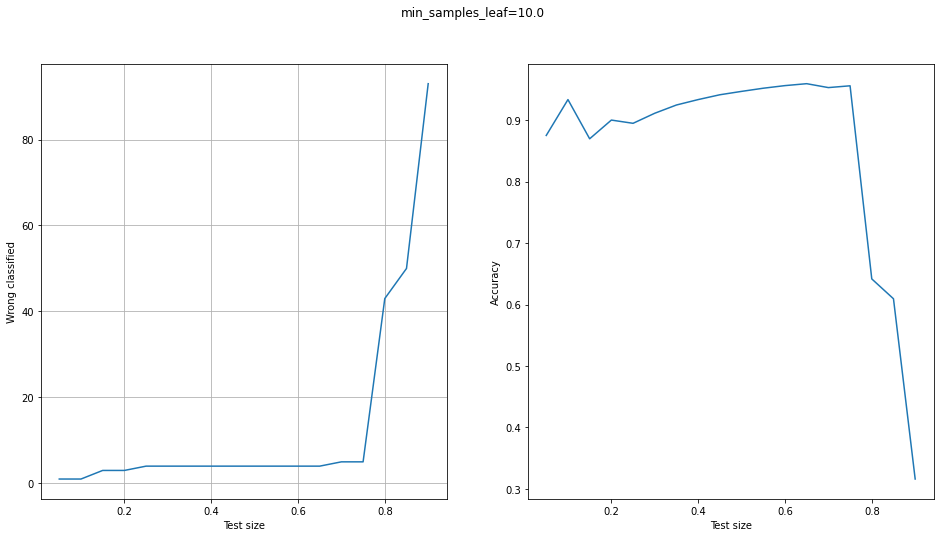

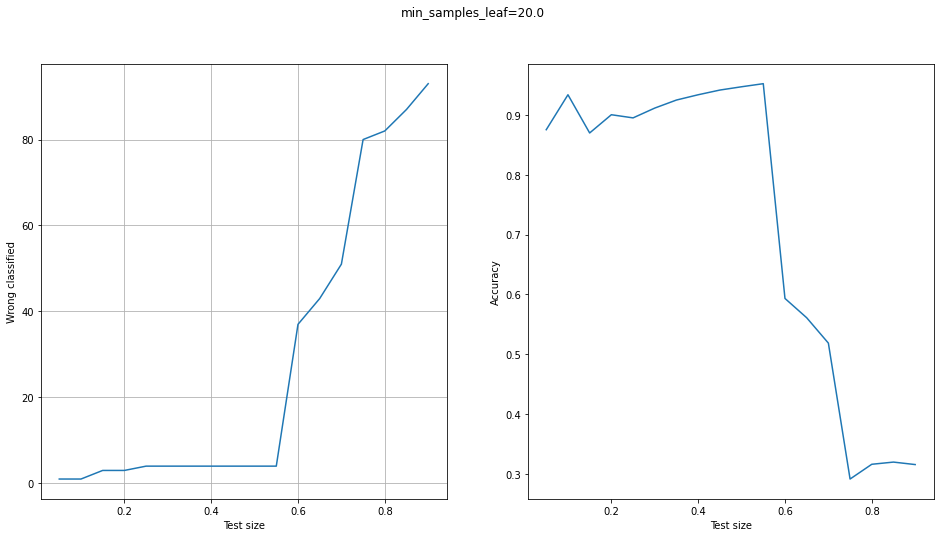

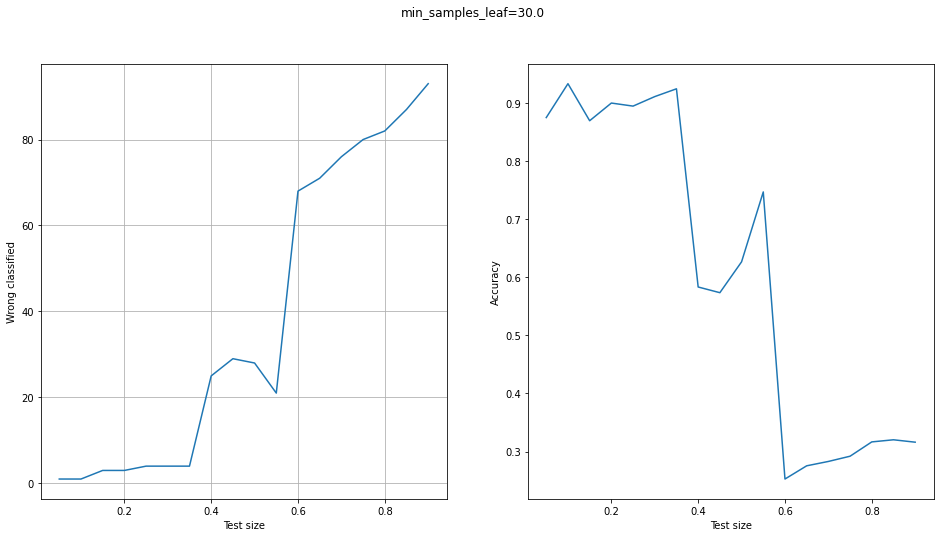

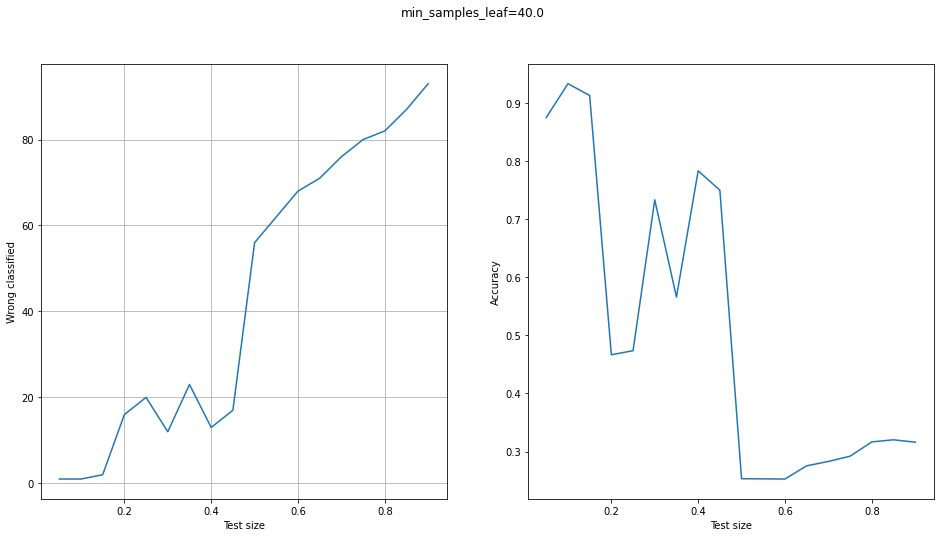

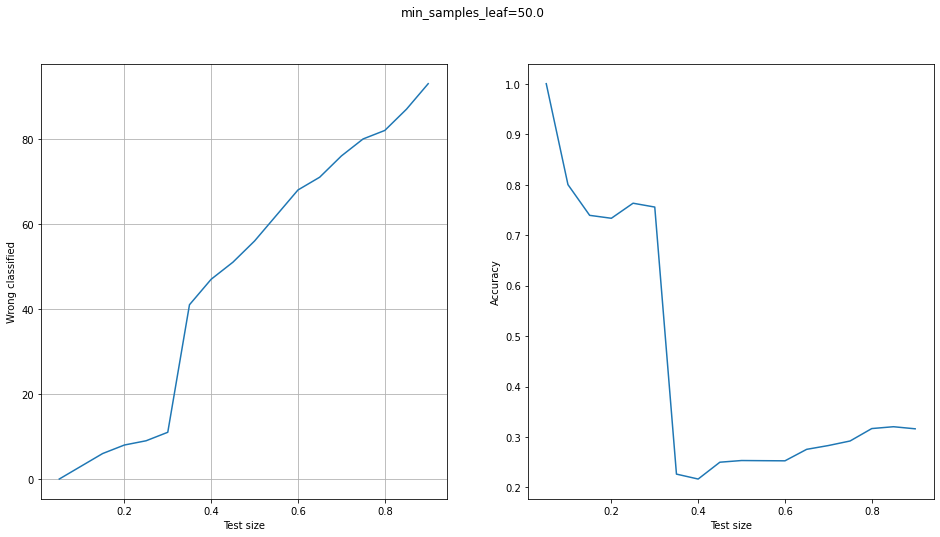

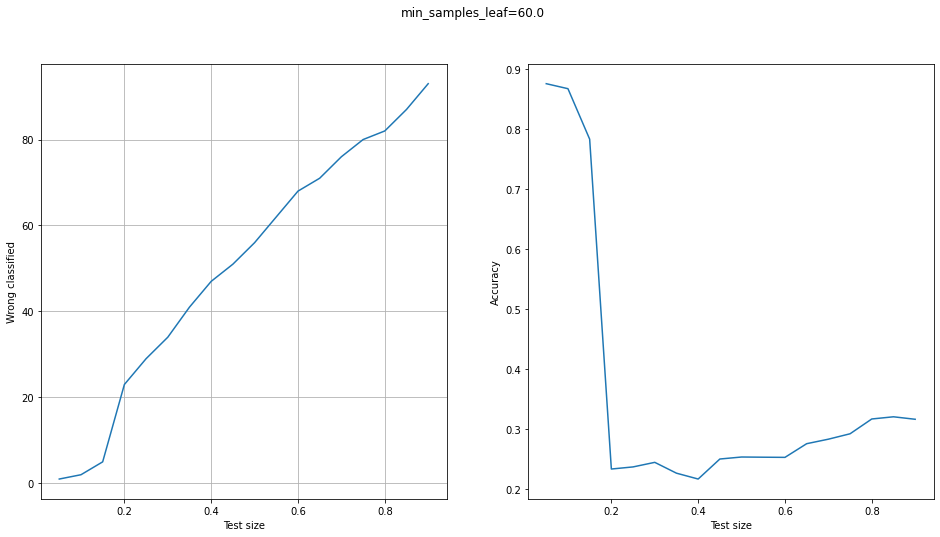

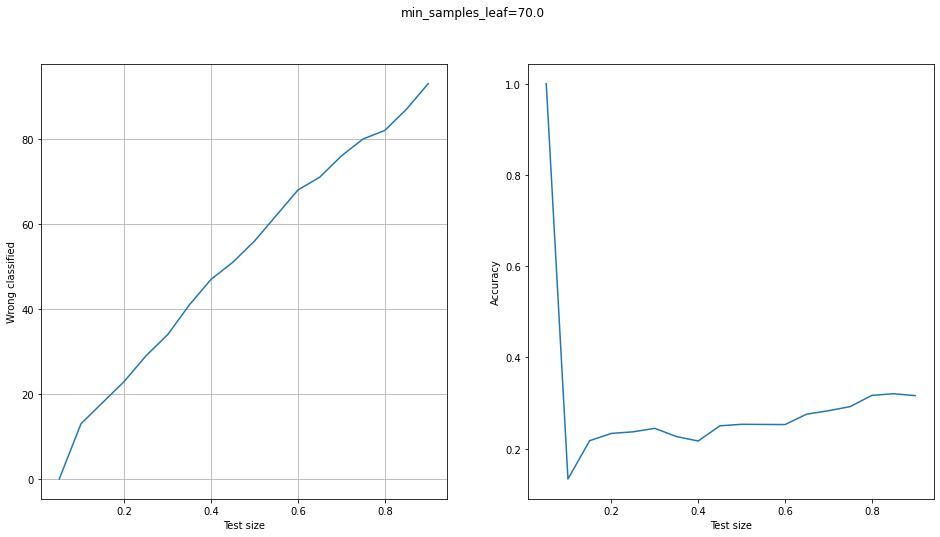

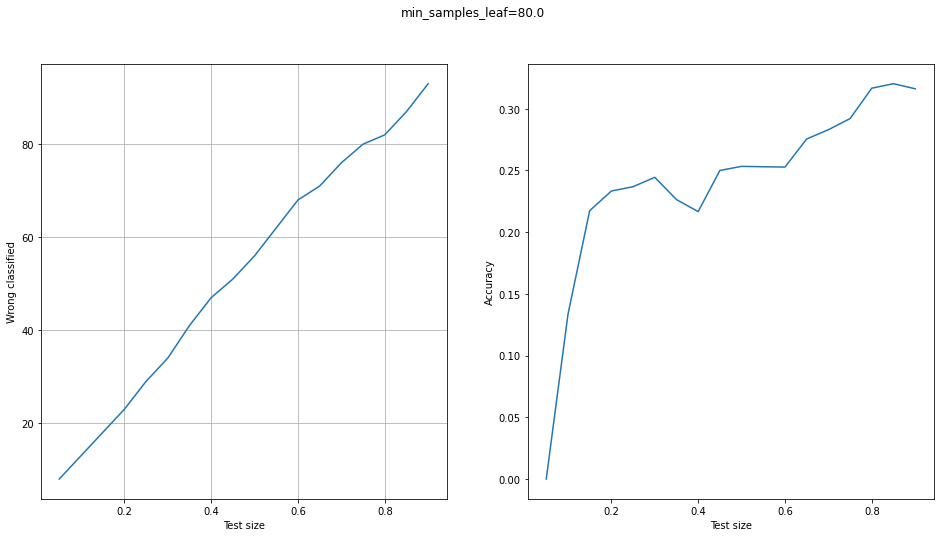

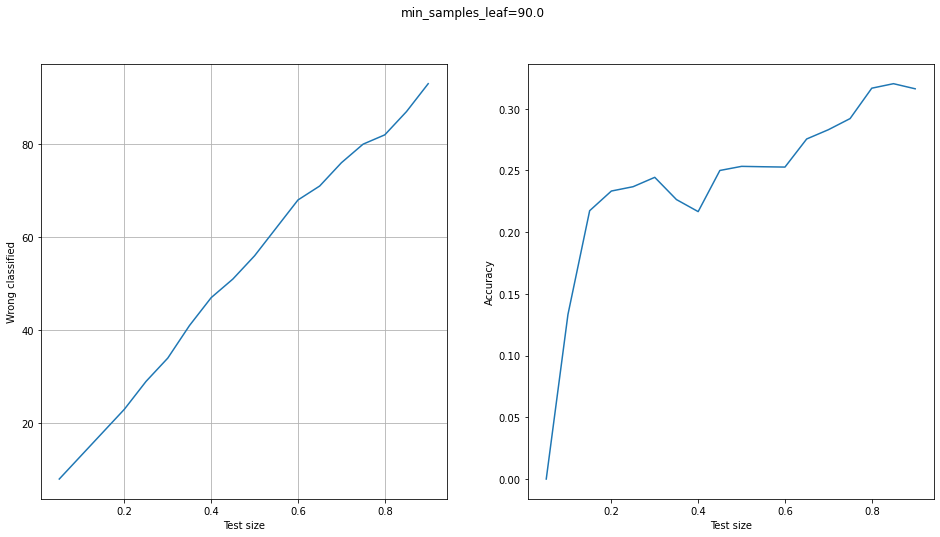

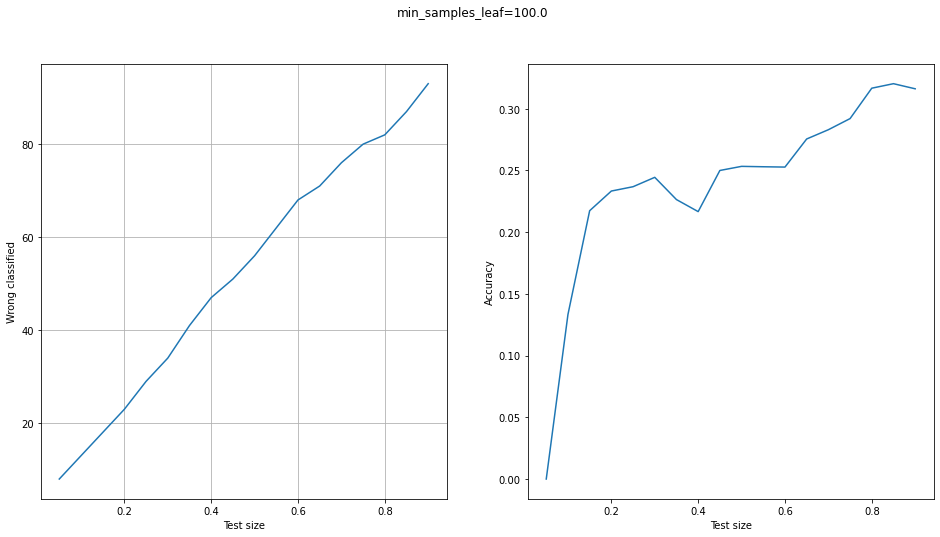

In [24]:
for min_samples_leaf in np.linspace(10, 100, 10):
    plot_classifier(
        tree.DecisionTreeClassifier(min_samples_leaf=int(min_samples_leaf)),
        f"{min_samples_leaf=}"
    )